# Exploring the Data

# Imports

In [1]:
# These are our two data analysis libraries
import pandas as pd
import numpy as np
# These are our two visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

sns.set( style = 'white' )


## G Patent DataFrame Loading
This is the data that we have on granted patents



In [2]:
df_patent = pd.read_csv("g_patent.tsv", delimiter='\t', dtype={'patent_id': str, 
                                                        'patent_type': str, 
                                                        'patent_title': str,
                                                        'patent_abstract': str,
                                                        'wipo_kind': str,
                                                        'num_claims': int,
                                                        'withdrawn': int,
                                                        'filename': str}, parse_dates=[2])

In [87]:
df_patent.head(20)

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,count
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,A frequency modulated (coherent) laser detecti...,B2,20,0,ipg180619.xml,1
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness c...,The injection molding machine includes a fixed...,B2,12,0,ipg180619.xml,1
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-e...,The present invention relates to: a method for...,B2,9,0,ipg180619.xml,1
3,10000003,utility,2018-06-19,Method for producing a container from a thermo...,The invention relates to a method for producin...,B2,18,0,ipg180619.xml,1
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, c...",The present invention relates to provides a do...,B2,6,0,ipg180619.xml,1
5,10000005,utility,2018-06-19,Article vacuum formation method and vacuum for...,A vacuum forming apparatus is provided that fo...,B2,4,0,ipg180619.xml,1
6,10000006,utility,2018-06-19,Thermoforming mold device and a process for it...,A thermoforming mold device (1) providing a pi...,B2,8,0,ipg180619.xml,1
7,10000007,utility,2018-06-19,PEX expanding tool,An expanding tool comprising: an actuator comp...,B2,24,0,ipg180619.xml,1
8,10000008,utility,2018-06-19,Bracelet mold and method of use,"A decorated strip of coated, heat-shrinkable, ...",B2,11,0,ipg180619.xml,1
9,10000009,utility,2018-06-19,Sterile environment for additive manufacturing,"In sterile, additive manufacturing wherein one...",B2,21,0,ipg180619.xml,1


### Granted Patent Analysis and Visualization

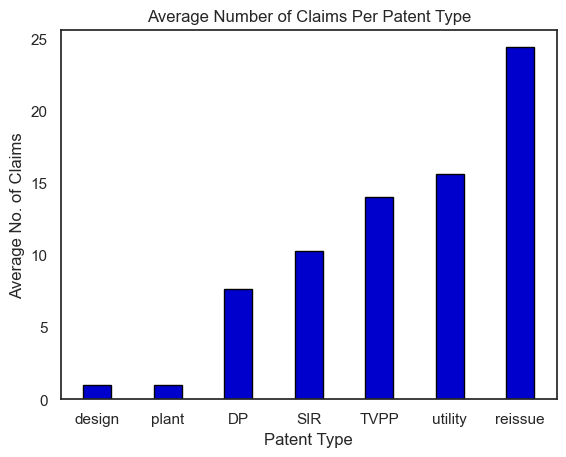

In [5]:
df_patent['count'] = 1

# Cleaning up the data to ask the question "Is there a connection between the type of patent 
# and the breadth of its claims / the number of claims"
type_counts = df_patent.groupby(['patent_type']).count()['count']
type_claims = df_patent.groupby('patent_type')['num_claims'].sum()
avg_claims = type_claims / type_counts

# Cleaning up the labels and sorting in increasing value
avg_claims.sort_values(ascending = True, inplace = True)
avg_claims.rename({'defensive publication': 'DP',
                   'statutory invention registration': 'SIR'}, inplace = True)

# creating the bar plot
plt.bar(avg_claims.index, avg_claims.values,
        color = 'mediumblue',
        edgecolor = 'black',
        width = 0.4)
 
plt.xlabel("Patent Type")
plt.ylabel("Average No. of Claims")
plt.title("Average Number of Claims Per Patent Type")
plt.show()

# What this shows us makes sense. As you get more specific in the type of patent,
# for example, a specific design you want to claim as your invention, you have less
# leeway for claiming other specific designs as yours. However, the very nature of items 
# like utility are made to cover a variety of situations and scenarios, so having
# a higher number of claims makes sense.
# Reissued patents having a noticeably higher average number of claims may tell a sort of story that I can
# further look into, maybe different patents have broadened in scope as technology advanced, or 
# other tools have advanced?

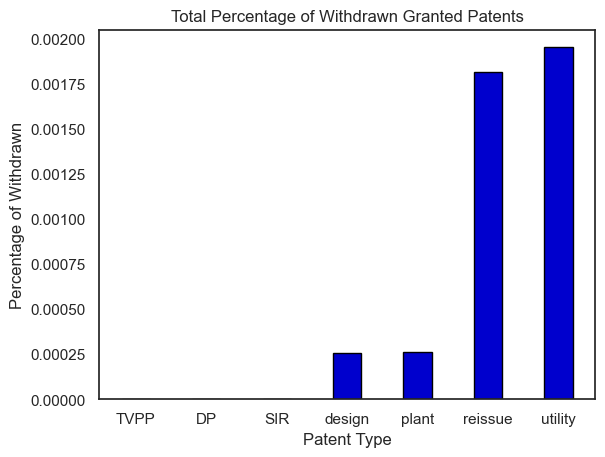

In [6]:

# Cleaning up the data to ask the question "Is there a connection between the type of patent
# and the total proportion of withdrawn patents"
type_withdrawn = df_patent.groupby('patent_type')['withdrawn'].sum()
avg_withdrawn = type_withdrawn / type_counts

# Cleaning up the data to present as a bar chart
avg_withdrawn.sort_values(ascending = True, inplace = True)
avg_withdrawn.rename({'defensive publication': 'DP',
                   'statutory invention registration': 'SIR'}, inplace = True)

# Actually plotting the data
plt.bar(avg_withdrawn.index, avg_withdrawn.values,
        color = 'mediumblue',
        edgecolor = 'black',
        width = 0.4)
 
plt.xlabel("Patent Type")
plt.ylabel("Percentage of Withdrawn")
plt.title("Total Percentage of Withdrawn Granted Patents")
plt.show()

# So what we see is something very similar to the previous bar chart displaying the correlation between 
# patent type and the number of claims. Both reissue and utility are at the tops of both charts, showing us 
# that perhaps having more claims means that the patents overreach, so the inventors have to withdraw their
# patents to scale down their number of claims

In [7]:
type_counts # this is important to have in mind while considering the above findings.
            # TVPP may actually have higher withdraws, we only have three claims for TVPP however,
            # so we may need more data to see if there is a change

patent_type
TVPP                                      3
defensive publication                   509
design                               721810
plant                                 30571
reissue                               20368
statutory invention registration       2259
utility                             7484622
Name: count, dtype: int64

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Patents in Thousands')]

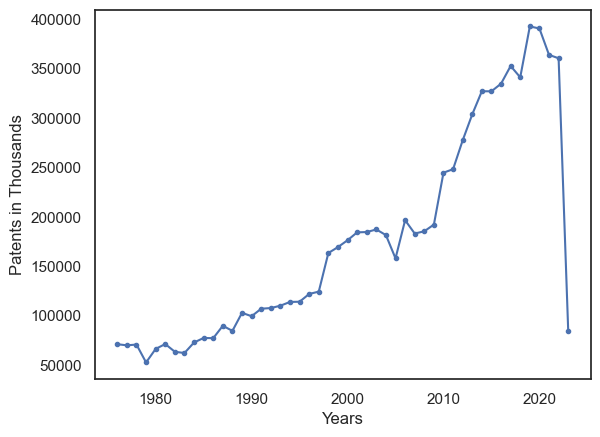

In [3]:
# Here we are considering whether there has been an increase in patents throughout the years
# it only makes sense that the answer to this question would be unequivocally : yes
pt_per_year = pd.to_datetime(df_patent['patent_date']).dt.year.value_counts() # this spits out a series
pt_per_year.sort_index(ascending=True, inplace=True)
ax = pt_per_year.plot.line(style='.-')
# What we see is that on average, the number of patents that are being made is increasing steadily, with some
# years having a drop in patents. We can further analyze why, and see if there where any distinct causes / reasons
ax.set(xlabel="Years", ylabel="Patents in Thousands")

<Axes: >

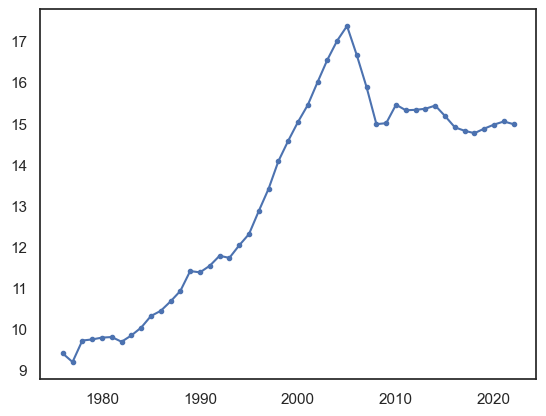

In [85]:
# Here we are trying to see if over the years, the proportional number of claims have gone up
# Perhaps as time has gone on, there has been a general shift to trying to expand the
# numbers of claims one patent has
claims_per_year = df_patent.groupby(df_patent.patent_date.dt.year)['num_claims'].sum()

df_patent['count'] = 1
year_counts = pd.to_datetime(df_patent['patent_date']).dt.year.value_counts(ascending=True)
proportional_claims = claims_per_year / year_counts
ax = proportional_claims.plot.line(style='.-', x='Year', y='Proportional Number of Claims')
# What we see is that there was a continual rise in the number of claims each patent would proportionally have,
# but somewhere around 2005, there has been a gradual lowering in the number of claims.
# What could have caused that? The 2008 market crash is around this period, could they be correlated?
ax.set(xlabel="Years", ylabel="Number of Claims Each Patent Made on Average Per Year")

### G CPC Current Loading
Current CPC classifications of granted patents. 

In [8]:
df_cpc = pd.read_table("g_cpc_current.tsv", delimiter="\t", dtype={"patent_id": int,
                                                               "cpc_sequence": int,
                                                               "cpc_section": str,
                                                               "cpc_subclass": str,
                                                               "cpc_group": str,
                                                               "cpc_type": str,
                                                               "cpc_symbol_position": str})

In [86]:
df_cpc

,patent_id,cpc_sequence,cpc_section,cpc_class,cpc_subclass,cpc_group,cpc_type,cpc_symbol_position
0,4796895,1,F,F16,F16H,F16H61/00,inventional,NaN
1,10913199,0,B,B29,B29C,B29C55/08,inventional,NaN
2,5208443,0,B,B29,B29C,B29C65/366,inventional,NaN
3,7830588,6,G,G09,G09G,G09G2310/0275,additional,NaN
4,7232943,1,A,A01,A01H,A01H5/10,inventional,NaN
...,...,...,...,...,...,...,...,...
48473807,11424636,12,Y,Y02,Y02T,Y02T90/12,additional,NaN
48473808,10393993,3,G,G02,G02B,G02B7/102,inventional,NaN
48473809,10684071,23,F,F25,F25J,F25J3/04,additional,NaN
48473810,7892555,0,A,A61,A61K,A61K39/005,inventional,NaN


In [10]:
# Here we are collecting and cleaning the data in the form of CPC values that 
# correlate to patents that are in the technology field
tech_df = df_cpc.loc[df_cpc['cpc_section'] == "Y"]
tech_df = tech_df.drop(columns=["cpc_sequence", "cpc_class", "cpc_subclass", "cpc_group", "cpc_symbol_position", "cpc_type"], axis=1)
tech_df['patent_id'] = tech_df['patent_id'].astype(str)
tech_df = pd.merge(df_patent.drop(axis=1, columns=df_patent.columns[3:]), tech_df, on="patent_id")
tech_df['count'] = 1
tech_df.groupby(['patent_type']).count()['count']
palette_color = sns.color_palette('dark')
tech_pie = tech_df.groupby(['patent_type']).count()['count']
tech_pie

patent_type
design           6
plant            2
reissue         39
utility    2858504
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x4860f9f00>,
 [Text(1.099999999976085, 7.253504137509645e-06, 'design'),
  Text(1.0999999998697954, 1.6924842986977375e-05, 'plant'),
  Text(1.0999999979904633, 6.649045612532491e-05, 'reissue'),
  Text(-1.0999999985341435, -5.678806771131953e-05, 'utility')])

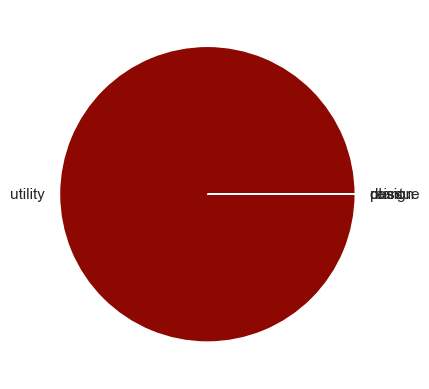

In [11]:
plt.pie(tech_pie.values, labels=tech_pie.index, colors=palette_color)
# As we can quite comedically see, the tech industry primarily revolves around building items
# that are classified under the 'utility' field

In [16]:
tech_type = df_cpc.loc[df_cpc['cpc_section'] == "Y"]
tech_type['count'] = 1
tech_type.groupby(['cpc_type']).count()['count']
# So it seems as if all the patents for the technology field seem to be "additional".
# This seems somewhat wrong, according to the definition of addition.
"""When allocating CPC symbols to a document based on disclosed information that is not inventive, 
the type attribute is set to “additional”. This is typically done by putting the symbol being allocated 
in the “discretionary” section of the classification form."""

/var/folders/5k/1x93y75n535cnmw44c8l2xbw0000gn/T/ipykernel_48455/3706369622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_type['count'] = 1


cpc_type
additional    2858551
Name: count, dtype: int64

In [101]:
media_df = df_cpc.loc[df_cpc['cpc_section'] == "Y"]
media_df = media_df.drop(columns=["cpc_sequence", "cpc_class", "cpc_subclass", "cpc_group", "cpc_symbol_position", "cpc_type"], axis=1)
media_df['patent_id'] = media_df['patent_id'].astype(str)
media_df = pd.merge(df_patent.drop(axis=1, columns=df_patent.columns[5:]), media_df, on="patent_id")

In [116]:
media_conclusion = media_df.loc[media_df['patent_title'].str.contains("social", case=False)]
media_conclusion

,patent_id,patent_type,patent_date,patent_title,patent_abstract,cpc_section
11016,10045152,utility,2018-08-07,Automated determination of mobile user locatio...,"A method, system, and/or apparatus for automat...",Y
12434,10051569,utility,2018-08-14,Methods for enterprise based socially aware en...,This technology provides a sustainable enterpr...,Y
16888,10070284,utility,2018-09-04,Low power high frequency social updates for mo...,"In one embodiment, a mobile device determines ...",Y
32391,10136275,utility,2018-11-20,Framework and applications for proximity-based...,A framework for use in developing proximity-ba...,Y
40406,10171599,utility,2019-01-01,Customizing tracking changes to user content i...,Updates to landing pages of users in an online...,Y
...,...,...,...,...,...,...
2853382,9978107,utility,2018-05-22,Method and system for establishing and using a...,Embodiments described herein provide numerous ...,Y
2853383,9978107,utility,2018-05-22,Method and system for establishing and using a...,Embodiments described herein provide numerous ...,Y
2853384,9978107,utility,2018-05-22,Method and system for establishing and using a...,Embodiments described herein provide numerous ...,Y
2856389,9990516,utility,2018-06-05,Security systems and methods for social networ...,"Data may be masked on public networks, such as...",Y


In [117]:
len(media_conclusion) / len(media_df)

9.515310379279572e-05

### G Location  - Exploring Data on the Location of the Patents Filed